In [23]:
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
matplotlib.rcParams.update({'font.size': 18,
                            'lines.linewidth' : 3,
                           'figure.figsize' : [15, 5],
                           'lines.markersize': 10})
pd.options.mode.chained_assignment = None

# Environment Setup
## Anaconda & Python (Language)

![anconda_logo](https://upload.wikimedia.org/wikipedia/en/c/cd/Anaconda_Logo.png)

Anaconda Distribution is the world's most popular Python data science platform. This handles all your Python packages, creates environments, and handles all the messy stuff.

### Installation
It is an open-source tool, available [https://www.anaconda.com/distribution/](https://www.anaconda.com/distribution/). Ideally, always go for the latest version of Python available. At the moment, this is Python3.7.

## Jupyter (IDE)
![jupyter_logo](https://www.dataquest.io/wp-content/uploads/2019/01/1-LPnY8nOLg4S6_TG0DEXwsg-1.png)

We shall be using Jupyter Notebook as our IDE. This is a web-based interactive computational environment and is one of the most-commonly used tool by Data Scientist. 
### Installation
It is automatically installed via Anaconda.
### Getting Started
It can be started either via terminal ```jupyter notebook``` or via GUI from Anaconda Navigator.
### Alternative IDEs
#### Spyder - https://www.spyder-ide.org/
| | |
|:-------------------------:|:-------------------------:|
|<img width="300" alt="spyder" src="https://www.pngitem.com/pimgs/m/600-6008961_atom-spyder-python-logo-png-transparent-png.png">| <img width="1604" alt="spyder_ide" src="https://steemitimages.com/0x0/https://s3-us-west-2.amazonaws.com/huntimages/production/steemhunt/2018-11-05/23281c4c-spyder.png">|

#### PyCharm - https://www.jetbrains.com/pycharm/
| | |
|:-------------------------:|:-------------------------:|
|<img width="300" alt="pycharm" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/PyCharm_Logo.svg/1200px-PyCharm_Logo.svg.png">  |  <img width="1604" alt="pycharm_ide" src="https://confluence.jetbrains.com/download/attachments/51188837/pyCharm3.png">|

# Intro to Machine Learning

What does it mean to learn?
- process where we take a series of observations
- draw conclusions based on past experiences.

As humans, we learn from our mistakes

For example,
- if I take the later bus,
- I'm late to work.

Machine Learning -> we teach a computer to find patterns in data.

Humans are really great at finding patterns,
- but relatively slow at looking through large amounts of data.  

Computers need to be trained to find the patterns,
- but they can process data of the sort of we have (csv files, images, etc) incredibly fast.

If we want to leverage machine learning, we need to teach computers to recognize patterns and leverage that ability to solve real world patterns.

Lets start with a really simple 1d example.


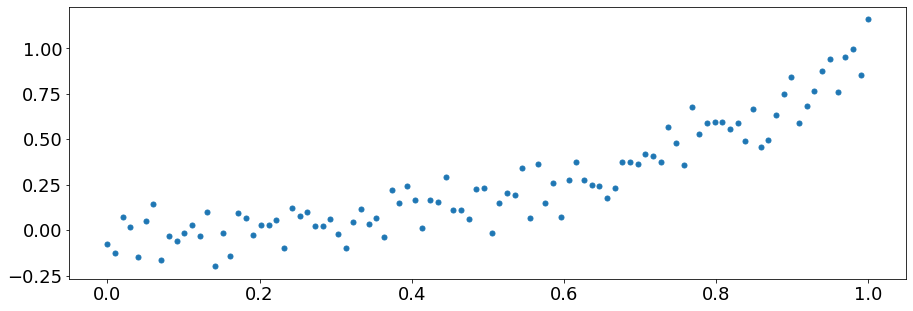

In [25]:
X = np.linspace(0, 1, 100)
exp = np.random.choice([2, 3])
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, y, '.');

We will now generate the predictive relationship by using one of the simplest possible methods, fitting a line to the data

In [27]:
from ipywidgets import interact, FloatSlider

def plotBestLine(m,c):
    plt.plot(X, y, '.', label='data');
    plt.plot(X, m*X + c, label = 'Model: {}x+{}'.format(m,c))
    plt.plot(X, X**exp, label=r'Truth: $x^{}$'.format(exp))
    plt.legend();

slider_m = FloatSlider(value=1, min=0, max=2, step=0.02, description='Gradient (m)')    
slider_c = FloatSlider(value=0, min=-0.5, max=0.5, step=0.02, description='Intercept (c)')    
interact(plotBestLine, m=slider_m, c=slider_c);

interactive(children=(FloatSlider(value=1.0, description='Gradient (m)', max=2.0, step=0.02), FloatSlider(valu…

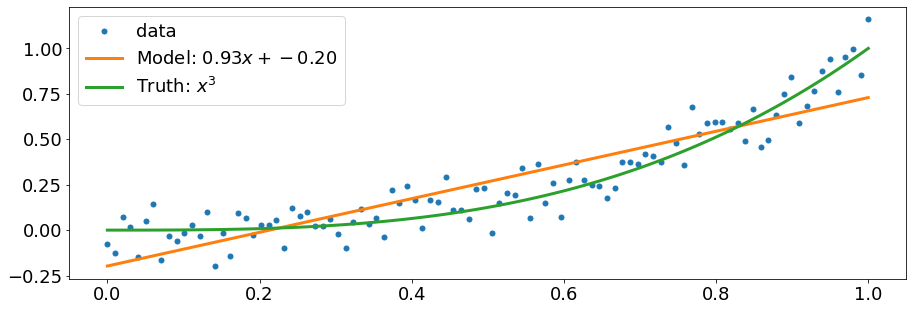

In [29]:
p = np.polyfit(X, y, 1)
z = np.poly1d(p)
plt.plot(X, y, '.', label='data');
plt.plot(X, z(X), label=r"Model: ${:.2f}x + {:.2f}$".format(*p))
plt.plot(X, X**exp, label=r'Truth: $x^{}$'.format(exp))
plt.legend();

We now have a model for this data, learned by the computer, namely given an $X$ value (or a bunch of values), we can predict the output.  In the context of Machine Learning, this is called a Linear Regression and is a quite powerful and general method to learn.  Just this example opens up many questions we will be answering in later lectures:

1. How good is the model?
2. Is the model generalizable?
3. What does this model teach us about the data?

Lets start with question 3, which in many ways is the most important question.  For this simple model we can see that the $y$ vector of labels has a positive correlation with the features $X$. 

## Why do we do Machine Learning
Normally the goal of machine learning is two-fold

1. To understand the data we already have
2. Use this understand to make predictions about unlabeled data

Machine Learning falls into two classes,
- **supervised learning**: learn a predictive relationship between _features_ of our data and some sort of output _target_ label
- **unsupervised learning**: find trends in our features without using any target labels

A human example for:
- Supervised Learning
    - borrowing books from a library on mathematics and geography.
        - we learn what symbols, images, and words are associated with math,
        - maps are associated with geography.
- Unsupervised task
    - borrow many books without knowing their subject.
        - some books contain similar images (maps)
        - some books contain similar symbols (e.g. the Greek letters $\Sigma$ and $\pi$).
        - We say the books containing maps are similar
        - Different from the books containing Greek letters.
        - **Crucially**, we do not know what the books are about, only that they are similar or different.



## Some data
Lets introduce a dataset to play with, namely the California housing data. The data set contains the median house value for each census block group in California.


In [5]:
from sklearn.datasets import fetch_california_housing

# get data
data = fetch_california_housing()
X = data['data']
y = data['target']

print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

## Supervised and Unsupervised Machine Learning
Lets first talk about supervised learning as that is where we will spend most of our time. Formally, the supervised machine problem can be stated as:
- given a matrix $X$, of dimensions $n \times p$, 
- create a predictive relationship (or function) $f(X)$ where
$$ f(X) \approx y $$ 
    - $y$ is a vector of dimension $n$.  
    - $X$ is referred to as the **feature matrix** and $y$ as the **labels**.

In [6]:
dt_cali = fetch_california_housing()
df_cali = pd.DataFrame(dt_cali.data, columns=dt_cali.feature_names)
df_target = [1 if ii < 2 else 0  for ii in dt_cali['target'] ]
numRows = 10
df_sup = df_cali.head(numRows)
df_sup['-'] = '--------'
df_sup['MedianHouseValue'] = dt_cali['target'][:numRows]
# df_sup['AffordableHouse'] = df_target[:numRows]
print('Supervised Learning Dataset:')
df_sup

Supervised Learning Dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,-,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,--------,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,--------,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,--------,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,--------,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,--------,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,--------,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,--------,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,--------,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,--------,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,--------,2.611


The general goal of supervised learning is to then apply this model to unlabeled data where can build a feature matrix representative of the original.  This allows us to make predictions! 

In [7]:
df_sup = df_cali.head(numRows+5)[-5:]
df_sup['-'] = '--------'
df_sup['MedianHouseValue'] = '?'
# df_sup['AffordableHouse'] = '?'
df_sup

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,-,MedianHouseValue
10,3.2031,52.0,5.477612,1.079602,910.0,2.263682,37.85,-122.26,--------,?
11,3.2705,52.0,4.772480,1.024523,1504.0,2.049046,37.85,-122.26,--------,?
12,3.0750,52.0,5.322650,1.012821,1098.0,2.346154,37.85,-122.26,--------,?
13,2.6736,52.0,4.000000,1.097701,345.0,1.982759,37.84,-122.26,--------,?
14,1.9167,52.0,4.262903,1.009677,1212.0,1.954839,37.85,-122.26,--------,?


In [8]:
print('Unsupervised Learning Dataset:')
df_cali.head(numRows)

Unsupervised Learning Dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


I will not be expanding more on Unsupervised Learning. However, I have provided a notebook ```ML99_Clustering``` for any interested parties.


Of course, machine learning is just a tool, one which must be applied with care and thought.  It is not the ideal solution to every problem.  Let us take a look at some of the issues we might find.

## Machine Learning Difficulties

Machine learning is just a tool and is not a 'one-fits-all' solution.

Models can be heavily biased and thus not flexible enough to handle generalization. Let us plot our original function over a larger range and use the model from before.

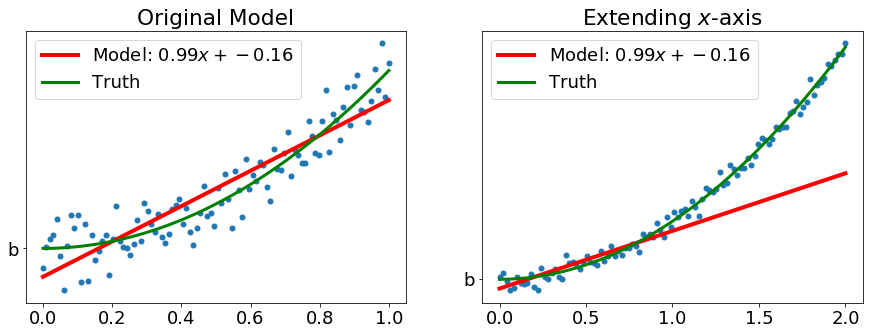

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2)
X = np.linspace(0, 1, 100)
y = X**2 + np.random.randn(X.shape[0])/10
p = np.polyfit(X, y, 1)
z = np.poly1d(p)
ax[0].plot(X, y, '.', 'b')
ax[0].plot(X, z(X), '-r', linewidth=4, label= "Model: ${:.2f}x + {:.2f}$".format(*p))
ax[0].plot(X, X**2,'-g', label=r'Truth')
ax[0].legend();
ax[0].set_title('Original Model');

X = np.linspace(0, 2, 100)
y = X**2 + np.random.randn(X.shape[0])/10
ax[1].plot(X, y, '.','b')
ax[1].plot(X, z(X), 'r', linewidth=4, label= "Model: ${:.2f}x + {:.2f}$".format(*p))
ax[1].plot(X, X**2,'-g', label=r'Truth')
ax[1].legend();
ax[1].set_title('Extending $x$-axis');

The model works fairly well for the range over which initially considered our data,
- but was crap beyond 1
- does not generalize well

This is a general problem;
- we should be careful that our training data contains well sampled data

**Machine learning finds patterns in data that it's already seen**, and it can't always make good predictions on data it hasn't.

Lets try to fix this by adding more parameters to the model.


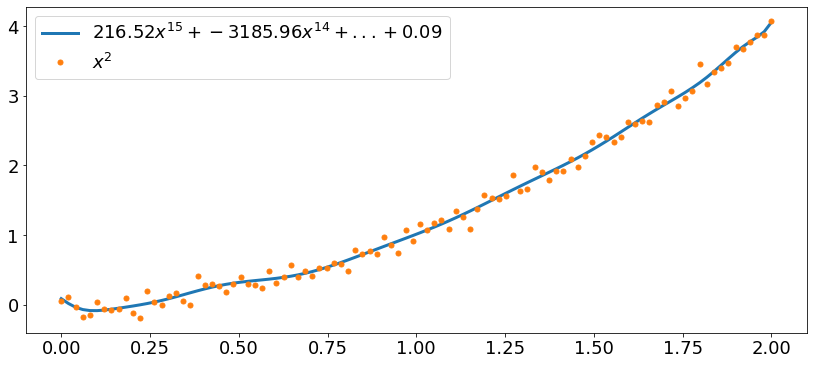

In [12]:
p = np.polyfit(X, y, 15)
z = np.poly1d(p)
plt.figure(figsize=[14, 6])
plt.plot(X, z(X), label=r"${:.2f}x^{{15}} + {:.2f}x^{{14}} + ... + {:.2f}$".format(*p[[0, 1, -1]]))
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend();

Wow looks like a perfect fit!  Maybe too good?  It looks like the model is fitting little wiggles in the data which we know are not real (the actual data is derived from a simple exponent).  Lets try to generalize again.

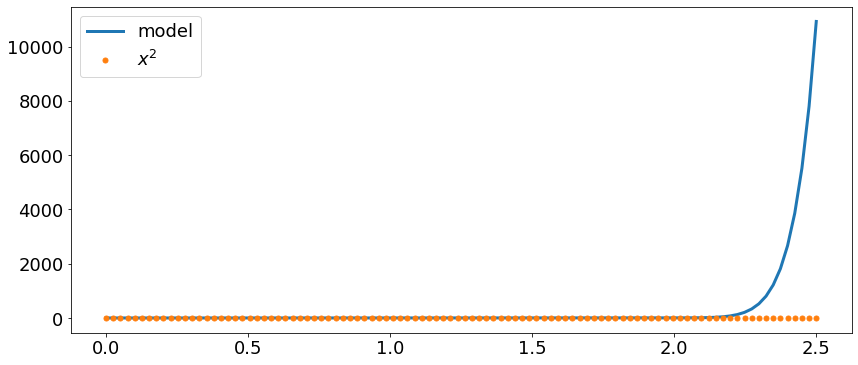

In [11]:
X = np.linspace(0, 2.5, 100)
y = X**exp + np.random.randn(X.shape[0])/10
plt.figure(figsize=(14,6))
plt.plot(X, z(X), label=r"model")
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend();

Wow again!  That is pretty bad.  This is an example of overfitting, where we have allowed the model too much flexibility and it has fit the noise in the data which is not generalizable.

We will learn more how to combat these issues, but the point is that we need to be careful when choose the model we want to use and the **hyperparameters** (in this case order of the polynomial) for the model.

# Scikit-Learn
- `Scikit-learn` is the most popular Python package for machine learning
- It has a plethora of machine learning models
    - a nice and intuitive interface.
- Create complicated machine learning workflows very easy



First we will need to import the estimator we want, in this case a `LinearRegression` (we only have to do this once per namespace, its just a Python class).

In [13]:
from sklearn.linear_model import LinearRegression

Now we can instantiate an instance of this class and pass any hyperparameters into the creation.  The [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) has two main hyperparameters, `fit_intercept` and `normalize`.  These have default values, but we will specify them here explicitly.

In [14]:
lr = LinearRegression(fit_intercept=True, normalize=False)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we can use this object to fit our data from before.  We will use the `fit` method to do this.  We will need to reshape the `X` vector so that its a feature matrix of a single column instead of a one dimensional vector.

In [15]:
lr.fit(X.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The `fit` method will perform the fit and save the fitted parameters internal to the state of the object.  We can see them if we wish.

In [16]:
lr.coef_, lr.intercept_

(array([2.00550921]), -0.6659900737105304)

Saving the parameters inside the instance is extremely useful as it allows us to pickle the entire object and save the parameters inside the model itself.  

Lastly we can use the `predict` method to make predictions. 

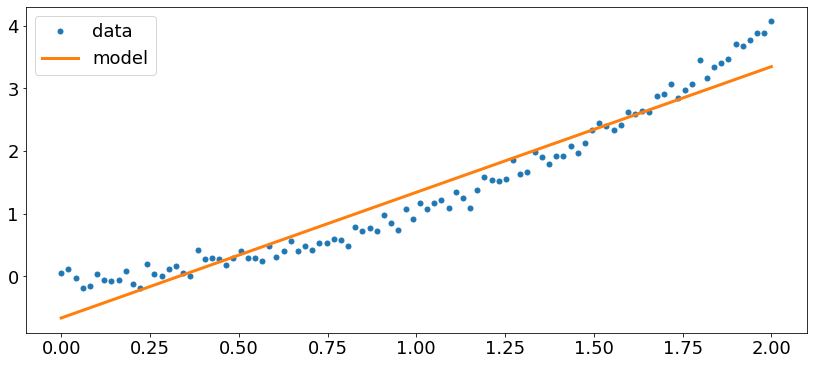

In [17]:
predictions = lr.predict(X.reshape(-1, 1))
plt.figure(figsize=(14,6))
plt.plot(X, y, '.', label='data')
plt.plot(X, predictions, label='model')
plt.legend();

We will explore linear models in more detail in a later lecture, but if we want to make this model better, we will need to engineer some better features.  To get a sneak peak of where we are going, lets deploy some more `scikit-learn` machinery.

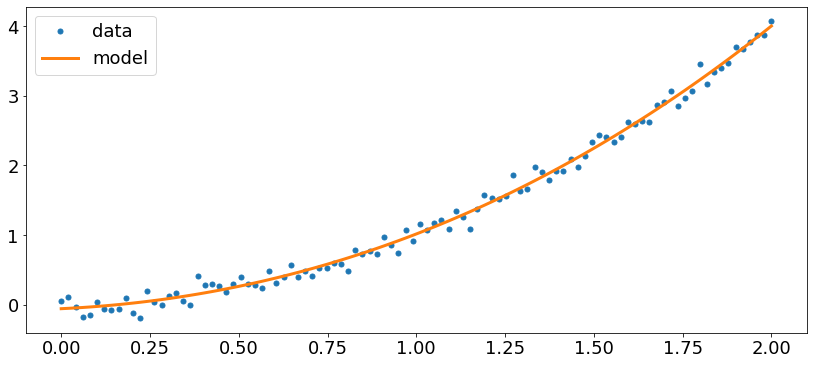

In [18]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(3)
lr = LinearRegression()

X_t = X.reshape(-1,1)
X_t = pf.fit_transform(X_t)
lr_fitted = lr.fit(X_t,y)

predictions = lr_fitted.predict(X_t)

plt.figure(figsize=(14,6))
plt.plot(X, y, '.', label='data')
plt.plot(X, predictions, label='model')
plt.legend();

Does this generalize?

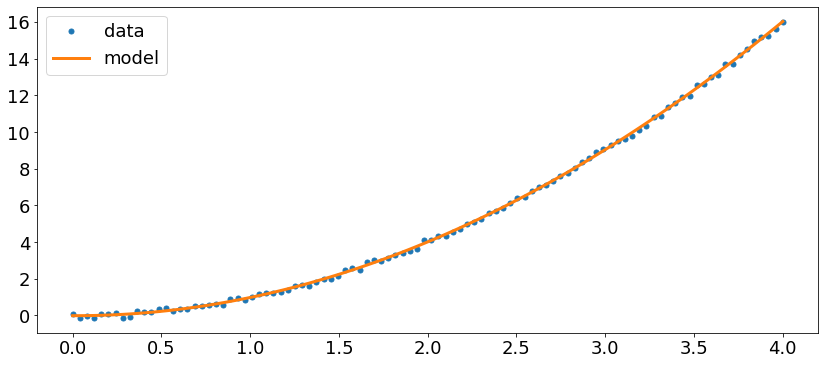

In [19]:
X = np.linspace(0, 4, 100)
y = X**exp + np.random.randn(X.shape[0])/10


X_t = X.reshape(-1,1)
X_t = pf.fit_transform(X_t)
lr_fitted = lr.fit(X_t,y)
predictions = lr_fitted.predict(X_t)

plt.figure(figsize=(14,6))
plt.plot(X, y, '.', label='data')
plt.plot(X, predictions, label='model')
plt.legend();

## Machine learning models as classes
- `Scikit-learn` relies heavily on object-oriented programming principles. 
- ML algorithms are classes
- Class names use CamelCase
 
Let's try it out with ```Ridge```

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)

In the above code, we set `alpha=0.1`. Here, `alpha` is a **hyperparameter** of the ridge model. Hyperparameters are model parameters that govern the learning process. In terms of hierarchy, they reside "above" the regular model parameters. They control what values the model parameters are equal to after undergoing training. They can be easily identified as they are the parameters that are set _prior_ to learning. In `scikit-learn`, hyperparameters are set when creating an instance of the class. The default values that `scikit-learn` uses are _usually_ a good set of initial values but this is not always the case. It is important to understand the hyperparameters available and how they affect model performance.

`Scikit-learn` refers to machine learning algorithms as **estimators**. There are three different types of estimators: 
1. classifiers, 
1. regressors, and 
1. transformers. 

## Predictors: classifiers and regressors

As the name suggests, predictors are models that make predictions. There are two main methods.

* `fit(X, y)`: trains/fit the object to the feature matrix $X$ and label vector $y$.
* `predict(X)`: makes predictions on the passed data set $X$.

In [20]:
from sklearn.linear_model import LinearRegression

# reload California Dataset
data = fetch_california_housing()
X = data['data']
y = data['target']

# create model and train/fit
model = LinearRegression()
model.fit(X, y)

# predict label values on X
y_pred = model.predict(X)

print(y_pred)
print("shape of the prediction array: {}".format(y_pred.shape))
print("shape of the training set: {}".format(X.shape))

[4.13164983 3.97660644 3.67657094 ... 0.17125141 0.31910524 0.51580363]
shape of the prediction array: (20640,)
shape of the training set: (20640, 8)


Note, the output of `predict(X)` is a NumPy array of one dimension. The array has the same size as the number of rows of the data that was passed to the `predict` method. 

Since we are using linear regression and our data has eight features, our model is

$$ y(X) = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \beta_8 x_8 + \beta_0. $$

The coefficients are stored in the fitted model as an object's attribute. `Scikit-learn` adopts a convention where all attributes that are determined/calculated _after_ fitting end in an underscore. The model coefficients and intercept are retrieved using the `coefs_` and the `intercept_` attributes, respectively.

In [21]:
print("β_0: {}".format(model.intercept_))

for i in range(8):
    print("β_{}: {}".format(i+1, model.coef_[i]))

β_0: -36.941920207184324
β_1: 0.4366932931343243
β_2: 0.009435778033238106
β_3: -0.10732204139090407
β_4: 0.6450656935198111
β_5: -3.976389421240506e-06
β_6: -0.003786542654971006
β_7: -0.42131437752714446
β_8: -0.43451375467477715


If we wanted to know how well the model performs making predictions with a data set, we can use the `score(X, y)` method. It works by

1. Internally running `predict(X)` to produce predicted values.
1. Using the predicted values to evaluate the model compared to the true label values that were passed to the method.

The evaluation equation varies depending if the model is a regressor or classifier. For regression, it is the $R^2$ value while for classification, it is accuracy.

In [22]:
print("R^2: {:g}".format(model.score(X, y)))

R^2: 0.606233


We used a rather simple model, linear regression. What if we wanted to use a more complicated model? All we need to do is an easy substitution; there is minimum code rewrite as the models have the same interface. Of course, different models have different hyperparameters so we need to be careful when swapping out algorithms. Let's use a more complicated model and train it.

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# create model and train/fit
model = GradientBoostingRegressor()
model.fit(X, y)

# predict label values on X
y_pred = model.predict(X)

print(y_pred)
print("R^2: {:g}".format(model.score(X, y)))

[4.26432728 3.87864519 3.92074556 ... 0.63664692 0.74759279 0.7994969 ]
R^2: 0.803324


## Transformers

Transformers are models that process and transform a data set. These transformers are very useful because rarely is our data in a form to feed directly to a machine learning model for both training and predicting. For example, a lot of machine learning models work best when the features have similar scales. All transformers have the same interface:

* `fit(X)`: trains/fits the object to the feature matrix $X$.
* `transform(X)`: applies the transformation on $X$ using any parameters learned
* `fit_transform(X)`: applies both `fit(X)` and then `transform(X)`.

Let's demonstrate transformers with `StandardScaler`, which scales each feature to have zero mean and unit variance. The transformed feature $x'_i$ is equal to

$$ x'_i = \frac{x_i - \mu_i}{\sigma_i}. $$

We'll use pandas to summarize the results of deploying the `StandardScaler` on the California housing data.

In [24]:
from sklearn.preprocessing import StandardScaler

# create and fit scaler
scaler = StandardScaler()
scaler.fit(X)

# scale data set
Xt = scaler.transform(X)

# create data frame with results
stats = np.vstack((X.mean(axis=0), X.var(axis=0), Xt.mean(axis=0), Xt.var(axis=0))).T
feature_names = data['feature_names']
columns = ['unscaled mean', 'unscaled variance', 'scaled mean', 'scaled variance']

df = pd.DataFrame(stats, index=feature_names, columns=columns)
df

,unscaled mean,unscaled variance,scaled mean,scaled variance
MedInc,3.870671,3.609148e+00,6.609700e-17,1.0
HouseAge,28.639486,1.583886e+02,5.508083e-18,1.0
AveRooms,5.429000,6.121236e+00,6.609700e-17,1.0
AveBedrms,1.096675,2.245806e-01,-1.060306e-16,1.0
Population,1425.476744,1.282408e+06,-1.101617e-17,1.0
AveOccup,3.070655,1.078648e+02,3.442552e-18,1.0
Latitude,35.631861,4.562072e+00,-1.079584e-15,1.0
Longitude,-119.569704,4.013945e+00,-8.526513e-15,1.0
